In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

ModuleNotFoundError: No module named 'cv2'

In [3]:
pip install opencv-python


   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   - -------------------------------------- 1.6/39.5 MB 9.4 MB/s eta 0:00:05
   -- ------------------------------------- 2.9/39.5 MB 7.0 MB/s eta 0:00:06
   ---- ----------------------------------- 4.2/39.5 MB 7.0 MB/s eta 0:00:06
   ----- ---------------------------------- 5.2/39.5 MB 6.6 MB/s eta 0:00:06
   ------ --------------------------------- 6.6/39.5 MB 6.3 MB/s eta 0:00:06
   -------- ------------------------------- 8.4/39.5 MB 6.7 MB/s eta 0:00:05
   ---------- ----------------------------- 10.0/39.5 MB 6.8 MB/s eta 0:00:05
   ------------ --------------------------- 12.3/39.5 MB 7.4 MB/s eta 0:00:04
   ------------- -------------------------- 13.6/39.5 MB 7.3 MB/s eta 0:00:04
   -------------- ------------------------- 14.7/39.5 MB 7.0 MB/s eta 0:00:04
   ---------------- ----------------------- 16.0/39.5 MB 6.9 MB/s eta 0:00:04
   ----------------- ---------------------- 17.0/39.5 MB 6.8 MB/s eta 0:00:04


In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [5]:
def load_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  
    image = cv2.resize(image, (64, 64)) 
    image = image.astype(np.float32) / 255.0
    return image

In [6]:
image_path = "D:\DS-DAY3\cat.jpg"  
image = load_image(image_path)

filter_3x3 = np.array([[1, 0, 0],
                        [0, 1, 0],
                        [0, 0, 1]], dtype=np.float32)

kernel = filter_3x3.reshape(3, 3, 1, 1)

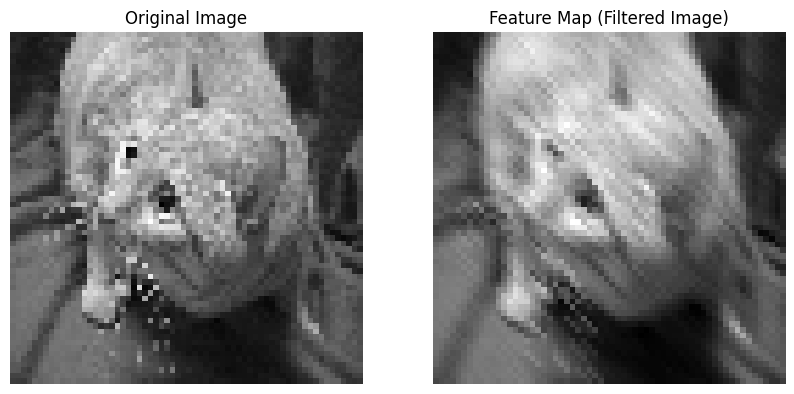

Feature map shape: (62, 62)
The filter detects diagonal patterns (from top-left to bottom-right).


In [7]:
image_tensor = tf.convert_to_tensor(image.reshape(1, 64, 64, 1), dtype=tf.float32)
kernel_tensor = tf.convert_to_tensor(kernel, dtype=tf.float32)

feature_map = tf.nn.conv2d(image_tensor, kernel_tensor, strides=[1, 1, 1, 1], padding='VALID')

feature_map = feature_map.numpy().squeeze()

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(feature_map, cmap='gray')
plt.title("Feature Map (Filtered Image)")
plt.axis("off")

plt.show()

print("Feature map shape:", feature_map.shape)
print("The filter detects diagonal patterns (from top-left to bottom-right).")